In [3]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from sklearn.decomposition import PCA

In [4]:
import imageio
from imageio import imread

C:\Users\user\AppData\Local\Temp\ipykernel_5196\383303810.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imread(os.path.join(root, file)) # Load image from a path


number of train data images is 154 and number of features for each image is 65536
image shape : (154, 65536)


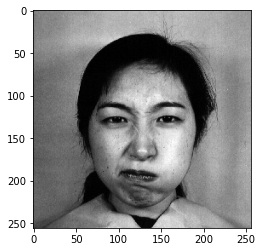

In [5]:
#import scipy.misc
import os
import matplotlib.pyplot as plt
import numpy as np

def main():
    train_data , train_label = loadImages('./FACES/train/')
    test_data , test_label = loadImages('./FACES/test/')

    print("number of train data images is" , train_data.shape[0] , "and number of features for each image is", train_data.shape[1])
    print("image shape :", train_data.shape)
    ### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
    plt.imshow(train_data[0].reshape(256,256) , cmap='gray')
    plt.show()

    ### Write your code here


    ###



def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label



if __name__ == '__main__':
    main()

In [6]:
train_data , train_label = loadImages('./FACES/train/')
test_data , test_label = loadImages('./FACES/test/')
train_data.shape, test_data.shape


C:\Users\user\AppData\Local\Temp\ipykernel_5196\383303810.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imread(os.path.join(root, file)) # Load image from a path


((154, 65536), (59, 65536))

(154, 65536)


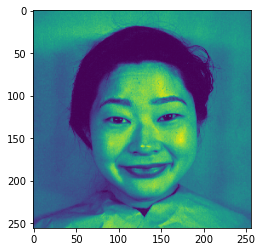

In [7]:
train_data = train_data
print(train_data.shape)
plt.imshow(train_data[100].reshape((256, 256)))

In [146]:
faces_pca = PCA()
faces_pca.fit(train_data)

PCA()

## 4.1.

### How do we decide the number of components in image compression?
PCA arranges the components in a descending order with respect to the information they carry. If we keep increasing the nubmer of components, we observe the information and details will increase. We can choose a optimum number of component that it keeps all details we need. In our case, by choosing 64 componets, we keep 94% of information.

### plot components


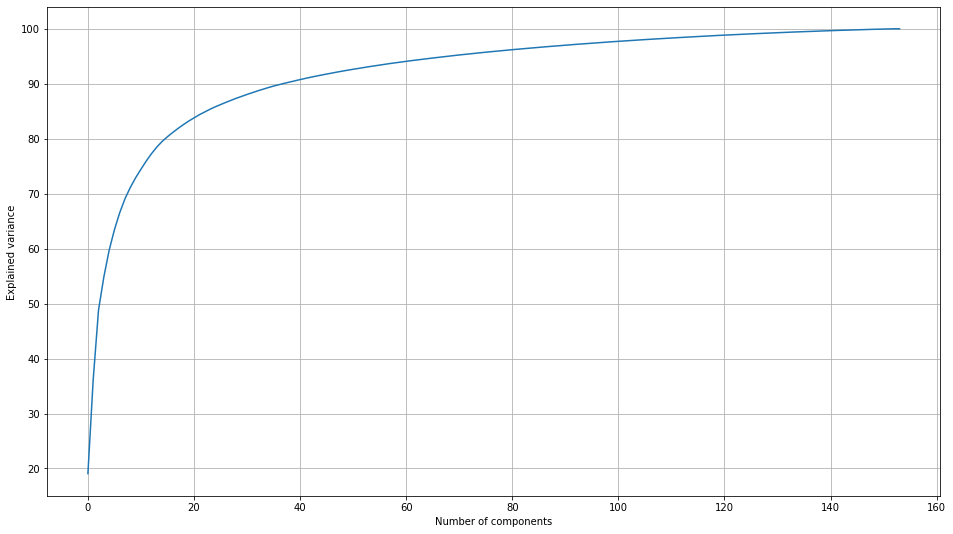

In [147]:
import numpy as np
from sklearn.decomposition import PCA

plt.figure(figsize=(16,9))
plt.grid()
plt.plot(np.cumsum(faces_pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

Text(0.5, 0, 'Components')

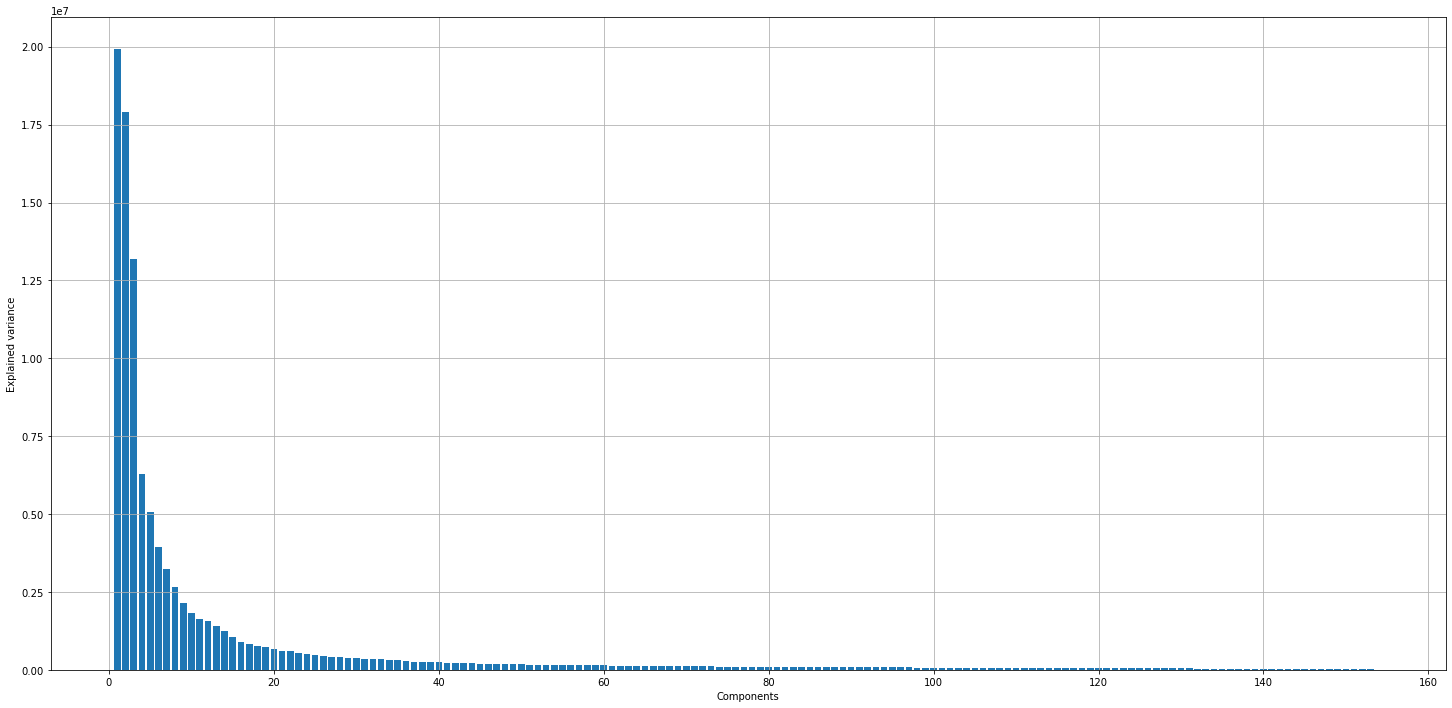

In [148]:
plt.figure(figsize=(25,12))
plt.grid()
plt.bar(range(1,len(faces_pca.explained_variance_ )+1),faces_pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')

94.42317982822141


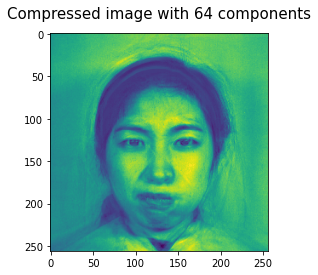

In [149]:
pca_64 = PCA(n_components=64)
faces_64_reduced = pca_64.fit_transform(train_data)
faces_64_recovered = pca_64.inverse_transform(faces_64_reduced)
print(np.cumsum(pca_64.explained_variance_ratio_ * 100)[-1])
face_pca_64 = faces_64_recovered[0,:].reshape([256,256])
plt.imshow(face_pca_64)
plt.title('Compressed image with 64 components', fontsize=15, pad=15)
plt.savefig("image_pca_10.png")

## 4.2

In this part we apply PCA to the dataset. In the first scenario, we use the first 4/145 components and reconstruct images. then, in second scenario, we use the last 4/154 components and recunstruct images. Results show below.

### Showing recovered image from first 4 components.

In [177]:
N_COMPONENTS = 4
data_reduced = np.dot((train_data - faces_pca.mean_), faces_pca.components_.T[:,:N_COMPONENTS])
data_recovered = np.dot(data_reduced, faces_pca.components_[:N_COMPONENTS, :]) + faces_pca.mean_



(45, 65536)


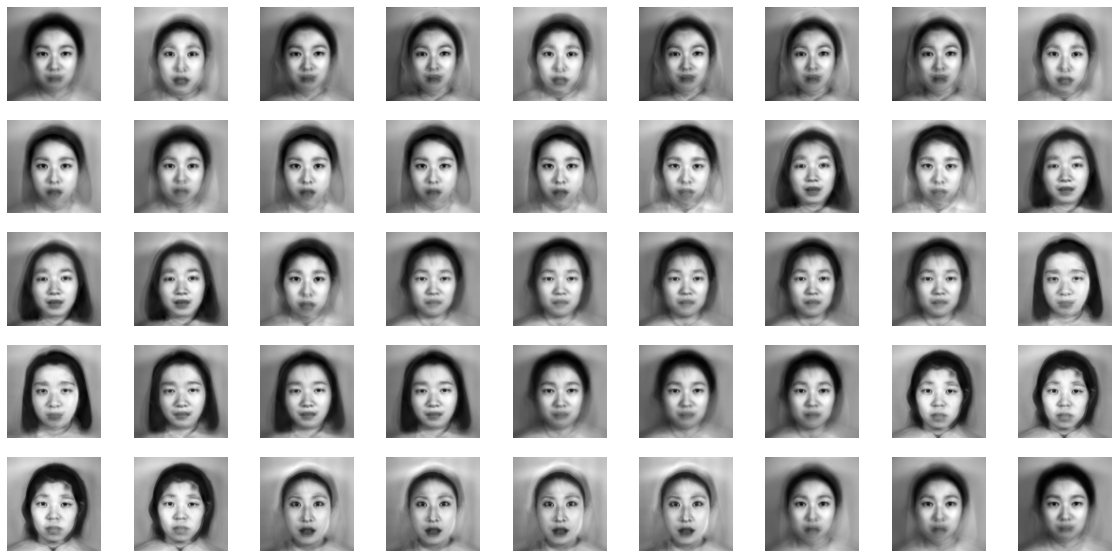

In [169]:
train_label_arr = np.array(train_label)
select_idx = train_label_arr == 'happy'
hapyimages = data_recovered[select_idx,]
print(hapyimages.shape)
fig = plt.figure(figsize=(20, 10))
for i in range(45):
    fig.add_subplot(5, 9, i+1)
    plt.axis('off')
    plt.imshow(
            hapyimages[i].reshape((256,256)),
            cmap='gray'
        )



### Showing recovered image from last 4 components.

(154, 4)


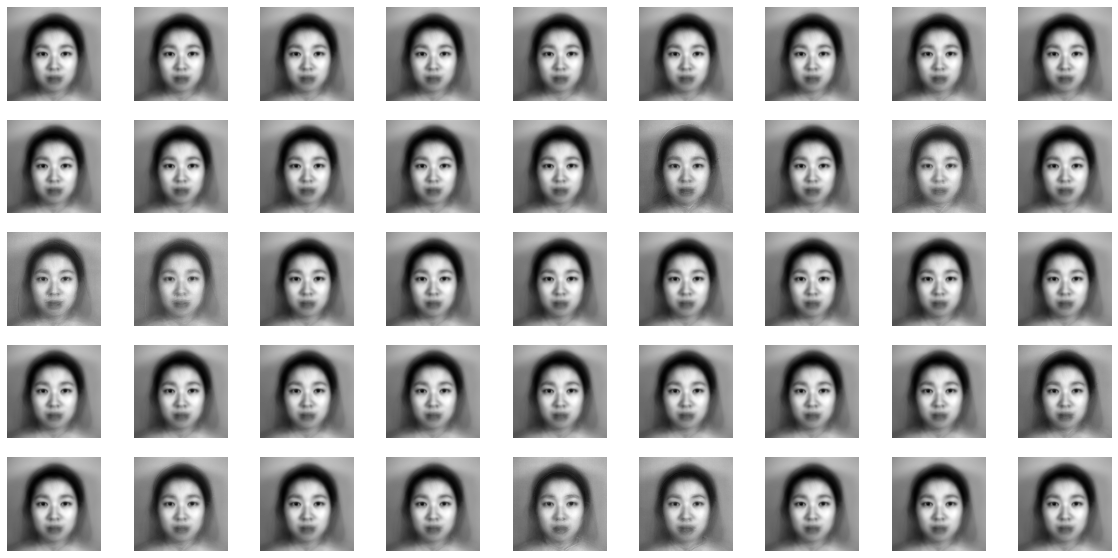

In [176]:
N_COMPONENTS = -4
data_reduced = np.dot(train_data - faces_pca.mean_, faces_pca.components_.T[:,N_COMPONENTS:])
print(data_reduced.shape)
data_recovered = np.dot(data_reduced, faces_pca.components_[N_COMPONENTS:,]) + faces_pca.mean_
hapyimages = data_recovered[select_idx,]
fig = plt.figure(figsize=(20, 10))
for i in range(45):
    fig.add_subplot(5, 9, i+1)
    plt.axis('off')
    plt.imshow(
            hapyimages[i].reshape((256,256)),
            cmap='gray'
        )



## 4.3 KNN & Confusion Matrix